# sector 5

In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,7]

## Import Data

In [2]:
# data = get_output('../combined_dataframe.txt')
# data.head()

In [3]:
data = get_output('../output_log/s7.txt')
length = len(data)

- Change path to storage

In [4]:
data = data[data.transit_prob == 'maybeTransit']
data['abs_path'] = data['path'].str.replace('/tmp/tess/', '/storage/astro2/phrdhx/tesslcs/')
print(len(data), f"after maybeTransit, {len(data)/length *100}% candidates remain")
data.head()

371755 after maybeTransit, 43.212904530697315% candidates remain


,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,abs_path
4,/tmp/tess/tesslcs_sector_7_104/tesslcs_tmag_10...,366398895,-4.90701,-4.49112,1511.74576,0.82290,0.00000,135.65641,29.70266,0.00000,...,22.18436,26.70156,0.85324,1.02698,0.00047,0.00052,0.00035,0.00041,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
7,/tmp/tess/tesslcs_sector_7_104/tesslcs_tmag_10...,319154525,-5.28031,-3.54241,1511.82827,0.90153,0.00403,14.72653,-29.41427,384689.96795,...,74.74719,83.11756,0.81247,0.90345,0.00033,0.00035,0.00028,0.00029,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
8,/tmp/tess/tesslcs_sector_7_104/tesslcs_tmag_10...,179639015,-4.19837,-4.00932,1509.30232,1.03989,0.00025,0.32136,8.99288,25.78283,...,29.58707,28.45155,1.13796,1.09429,0.00063,0.00062,0.00051,0.00051,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
10,/tmp/tess/tesslcs_sector_7_104/2_min_cadence_t...,106626452,-8.93445,-2.88800,1500.38970,0.99667,0.00085,0.20622,0.00482,43031.15882,...,3311.61274,3300.92910,19.48007,19.41723,0.00063,0.00063,0.00039,0.00039,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
14,/tmp/tess/tesslcs_sector_7_104/tesslcs_tmag_11...,149120459,-5.89926,-3.63809,1511.21935,0.99995,0.00034,0.17630,-1.29538,3.92098,...,97.45513,97.38860,0.93707,0.93643,0.00072,0.00072,0.00057,0.00057,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...


## Removing worst anomalies

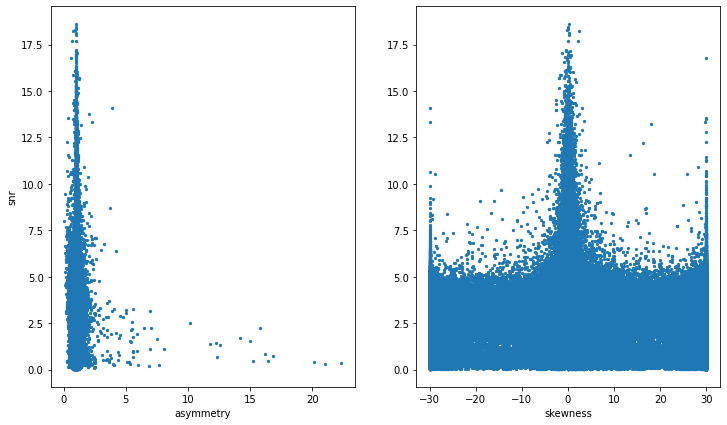

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

In [6]:
data = data[(data.asym_score <= 3)].reset_index(drop=True)

---

### Some EDA

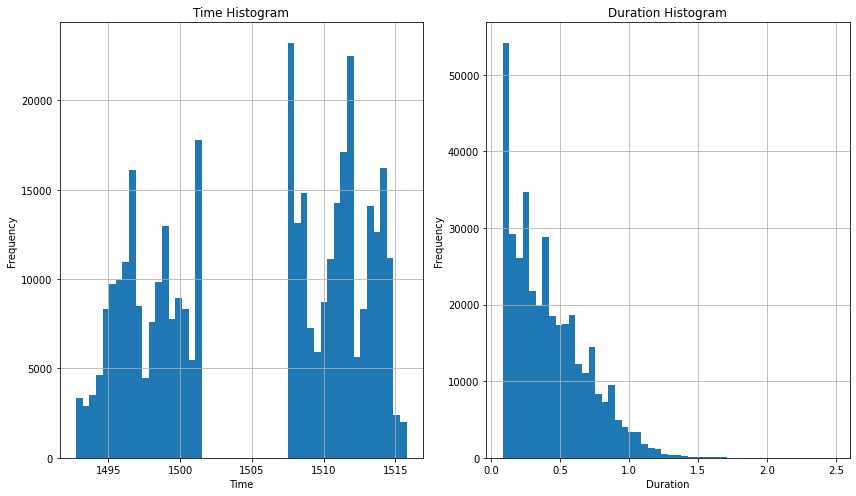

In [7]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

## SNR cut

In [8]:
data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
len(data_new)

10349

## Duration cut

In [9]:
data_new.drop(data_new[data_new['duration'] <= 0.4].index,inplace=True)

## Depth cut

In [10]:
data_new['abs_depth'] = abs(data_new.depth)

In [11]:
data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index,inplace=True)

---

## Remaining Candidates

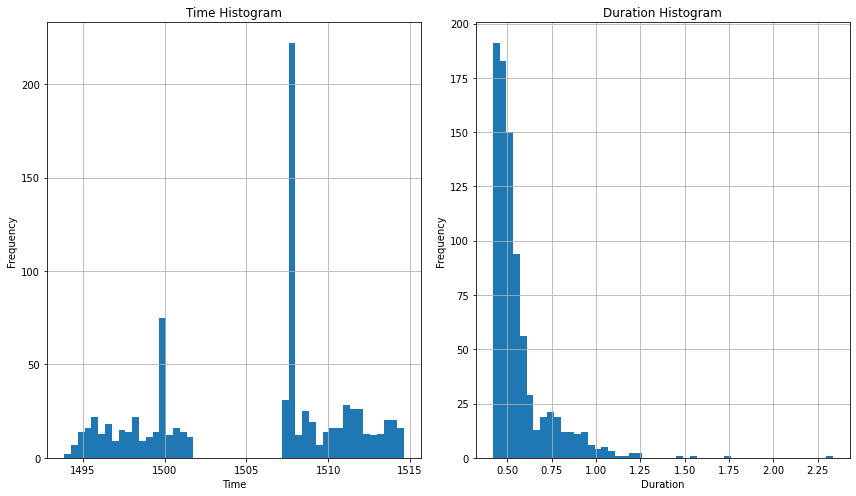

In [12]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data_new['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data_new['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

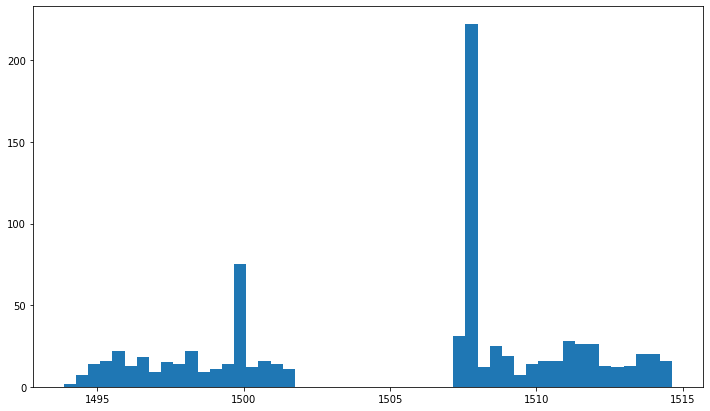

In [13]:
hist_values, bin_edges, _ = plt.hist(data_new['time'], bins=50)
#duration_hist_values, duration_bin_edges, _ = plt.hist(data_new['duration'], bins=50)

# Find the index of the bin with the maximum count
max_bin_index = np.argmax(hist_values)

# Retrieve the bin count and bin edges for the bin with the most count
max_bin_count = hist_values[max_bin_index]
bin_left_edge = bin_edges[max_bin_index]
bin_right_edge = bin_edges[max_bin_index + 1]

In [14]:
hist_values

array([  2.,   7.,  14.,  16.,  22.,  13.,  18.,   9.,  15.,  14.,  22.,
         9.,  11.,  14.,  75.,  12.,  16.,  14.,  11.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  31.,
       222.,  12.,  25.,  19.,   7.,  14.,  16.,  16.,  28.,  26.,  26.,
        13.,  12.,  13.,  20.,  20.,  16.])

In [15]:
# # Filter the DataFrame for data within the specified time bin
# subset_data = data_new[(data_new['time'] >= bin_left_edge) ]

# # Calculate the histogram for the 'duration' column within the time bin
# duration_hist_values, duration_bin_edges = np.histogram(subset_data['duration'], bins=50)

# max_duration_bin_index = np.argmax(duration_hist_values)

# # Retrieve the bin count and bin edges for the most common duration bin within the time bin
# max_duration_bin_count = duration_hist_values[max_duration_bin_index]
# duration_bin_left_edge = duration_bin_edges[max_duration_bin_index]
# duration_bin_right_edge = duration_bin_edges[max_duration_bin_index + 1]

# plt.hist(subset_data['duration'], bins=10, alpha=0.7)  # Adjust color and alpha as desired
# plt.show()

In [16]:
print(bin_left_edge, "start of bin")
print(bin_right_edge, "end of bin")
print(max_bin_count, "number of lcs")

1507.571462 start of bin
1507.987286 end of bin
222.0 number of lcs


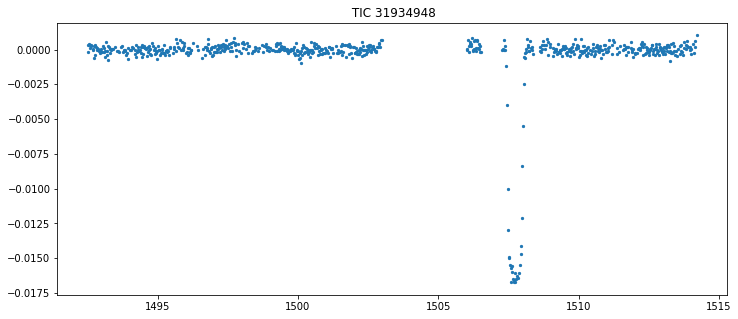

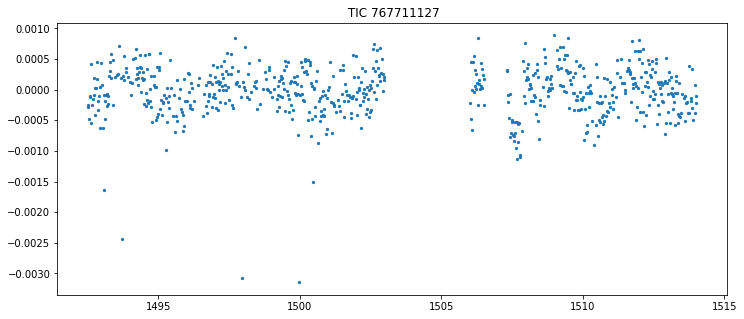

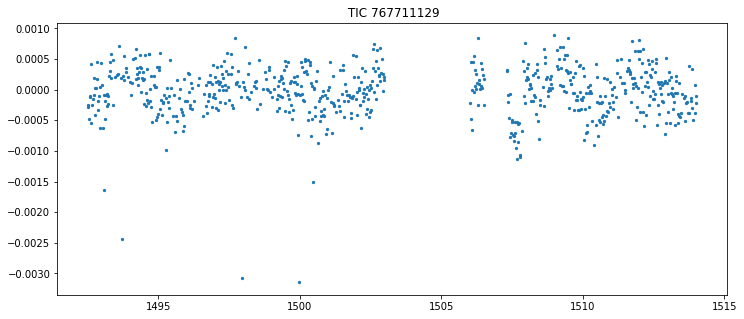

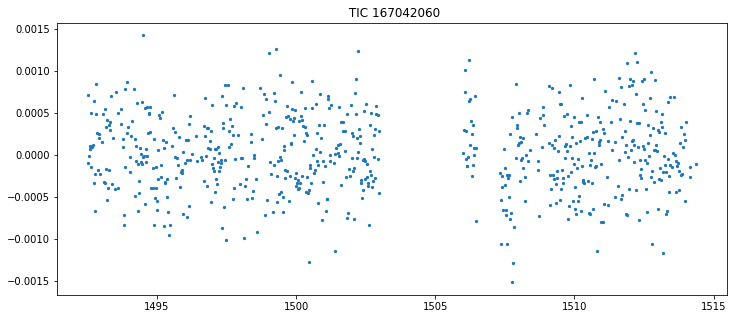

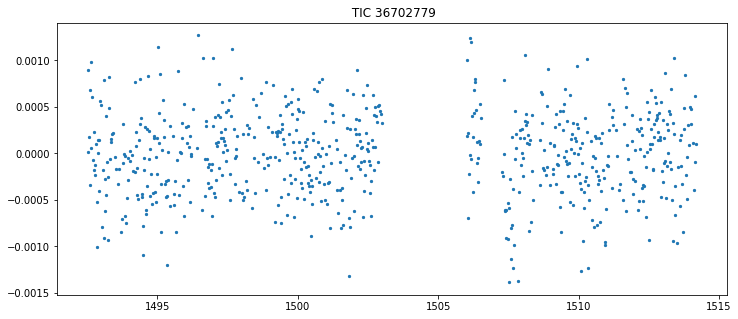

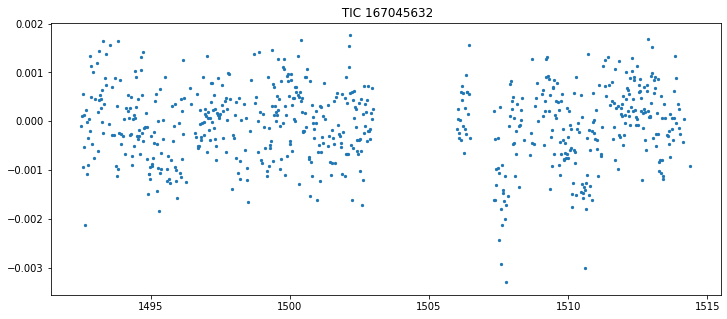

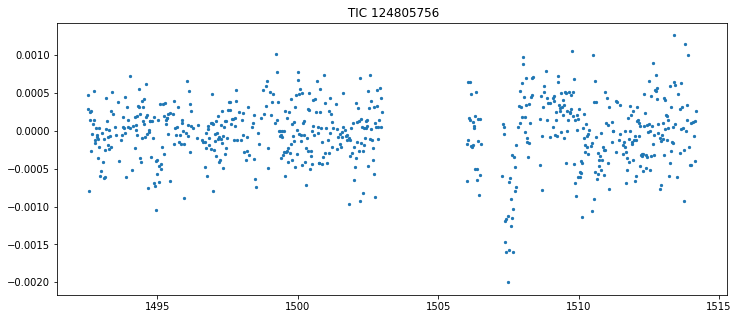

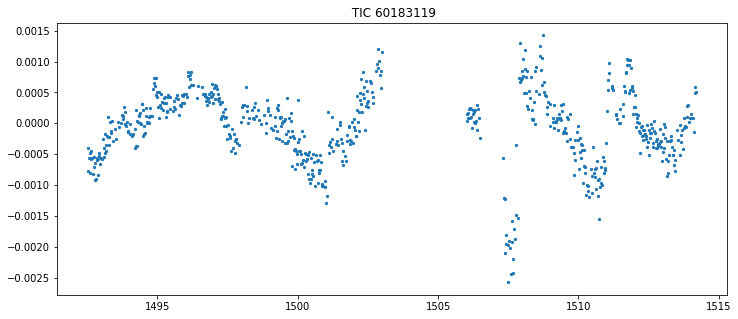

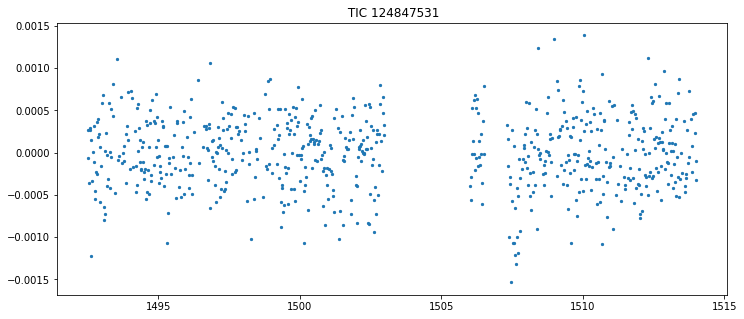

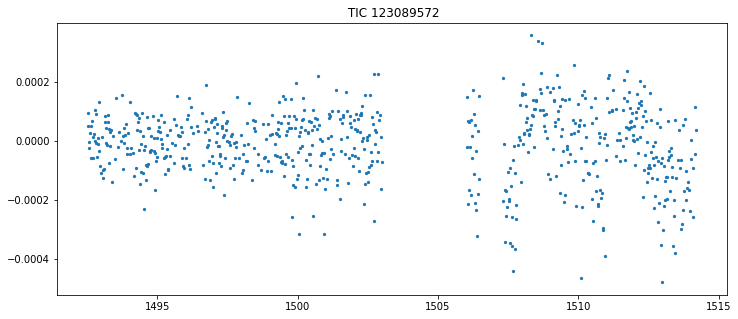

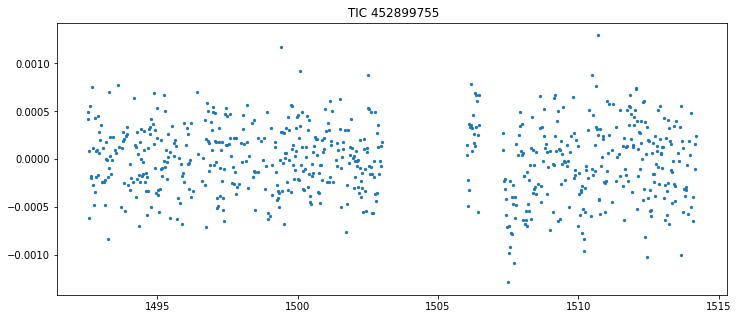

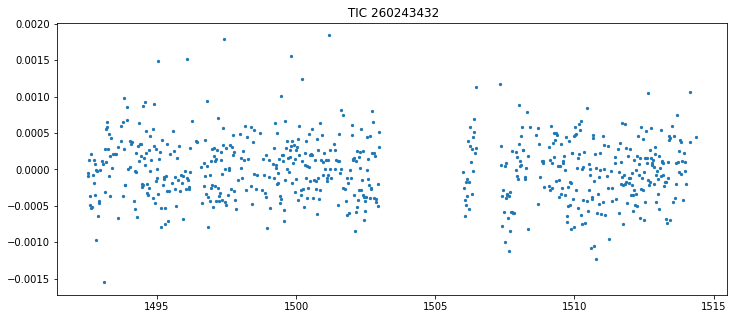

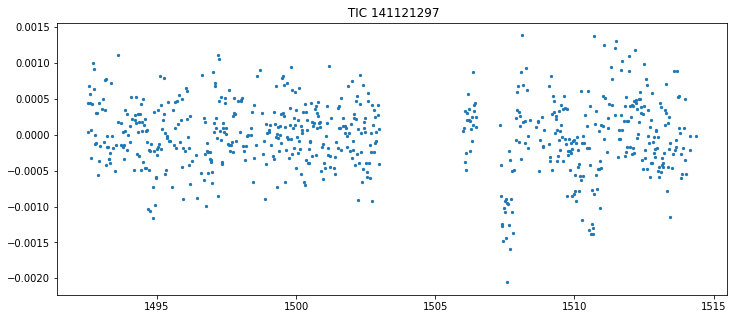

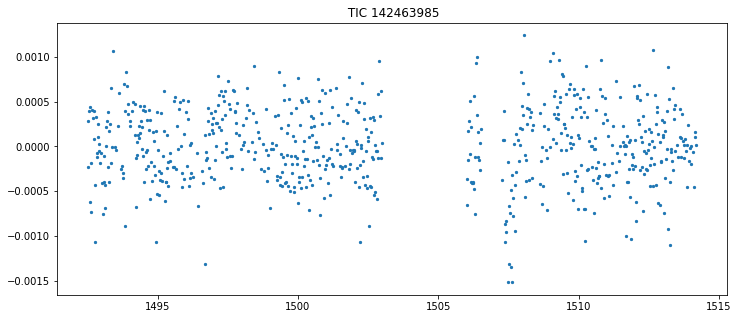

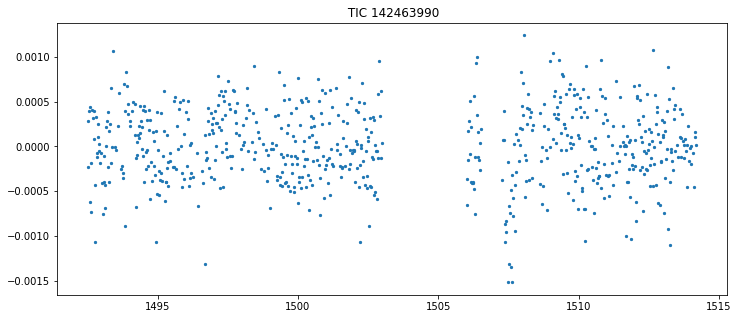

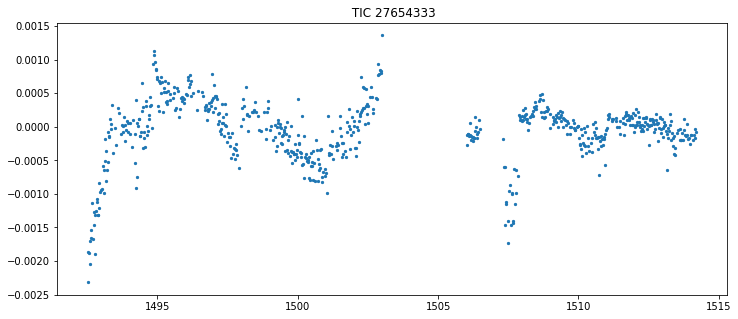

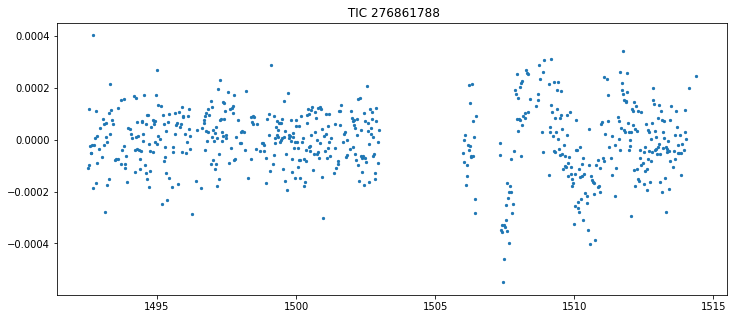

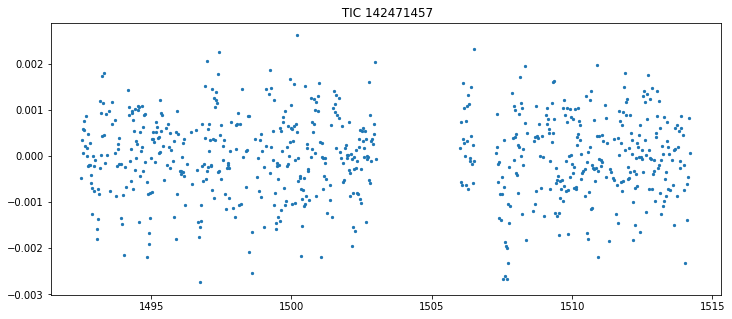

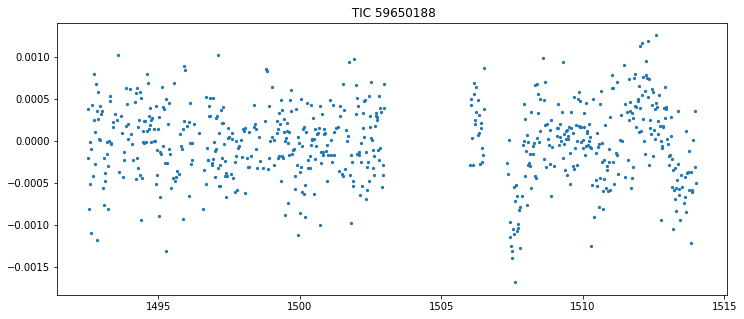

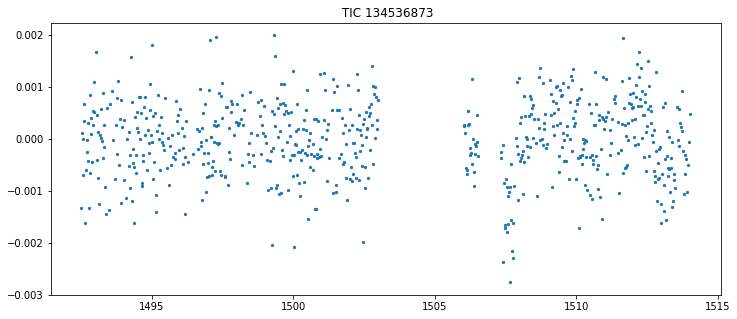

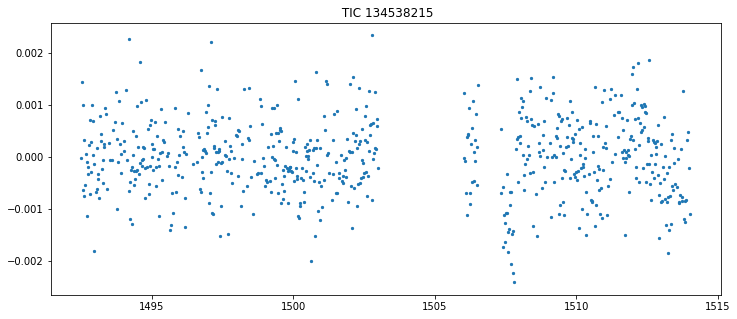

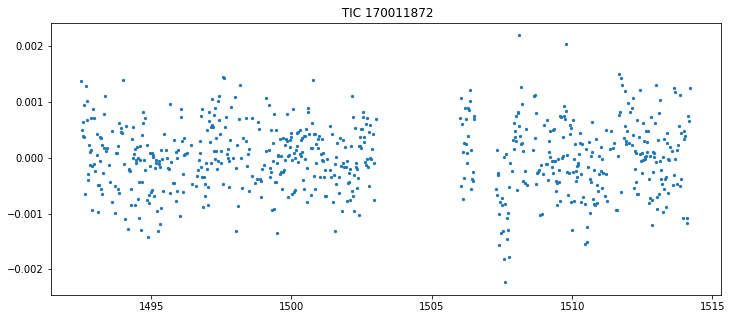

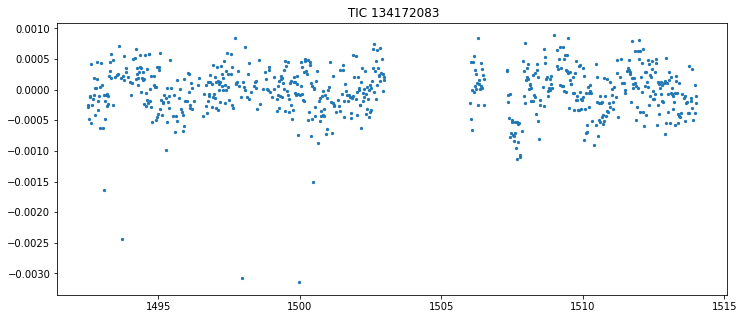

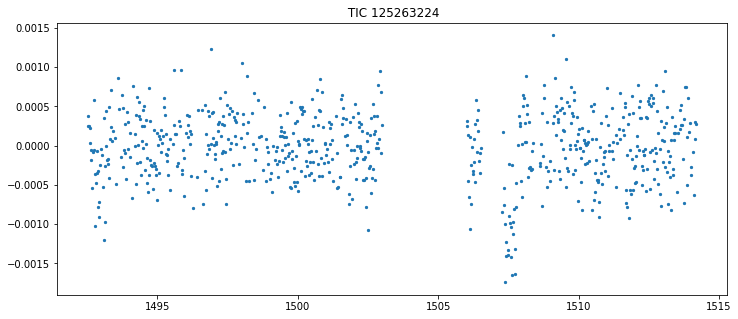

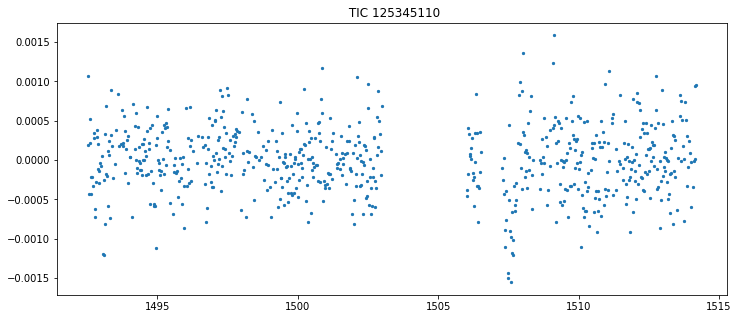

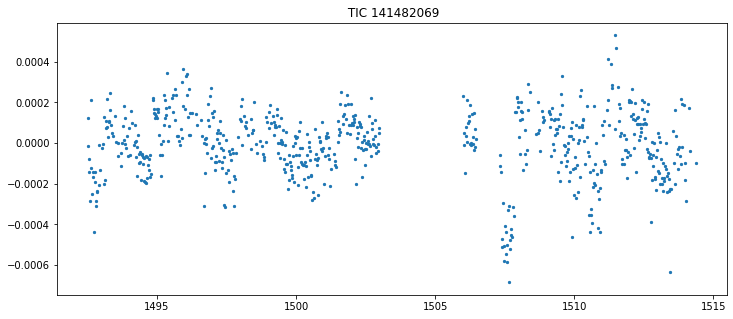

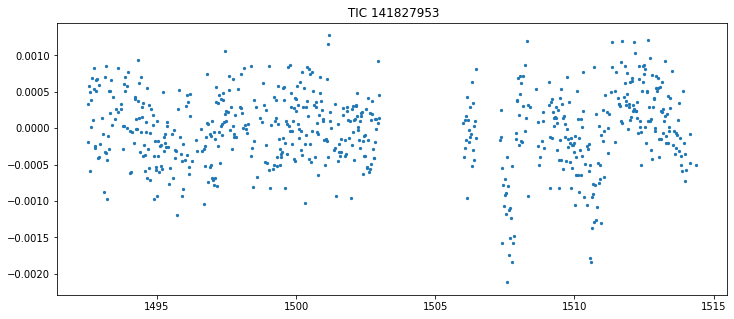

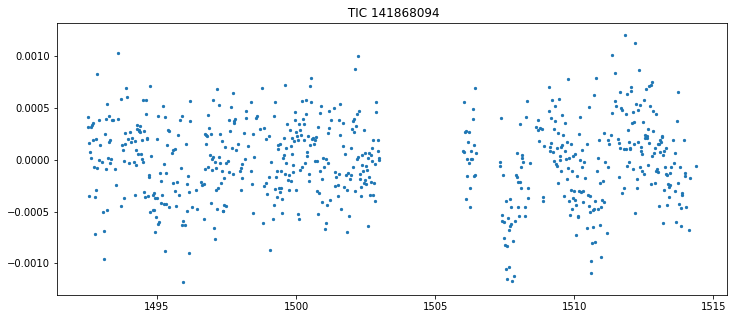

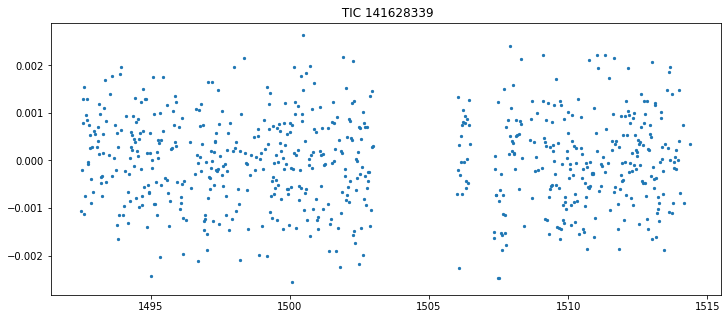

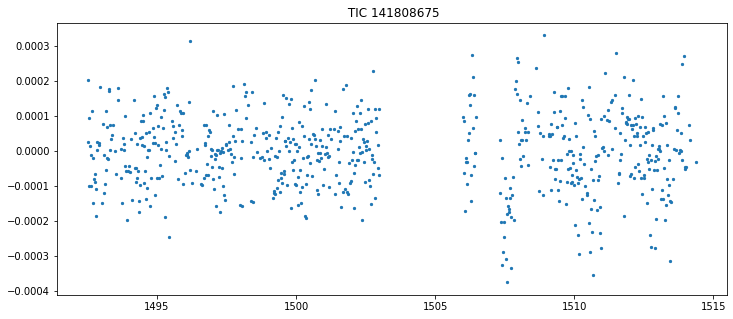

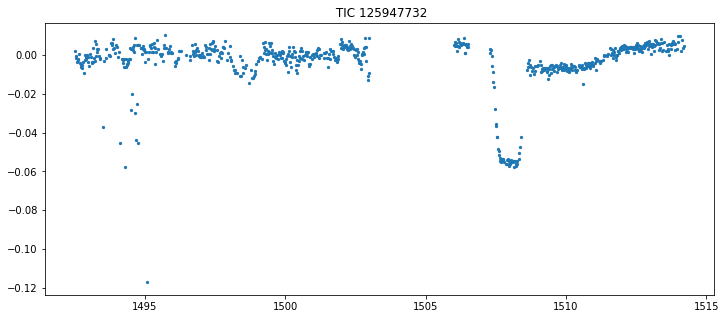

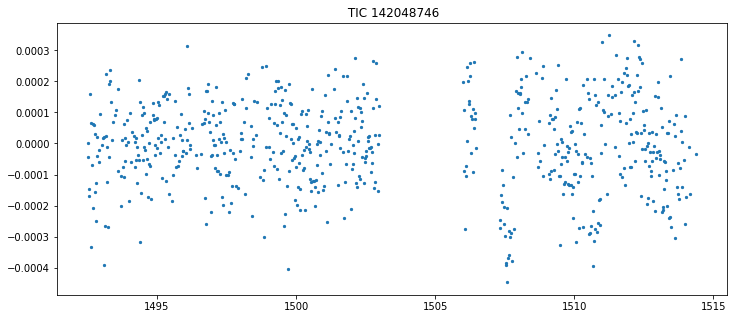

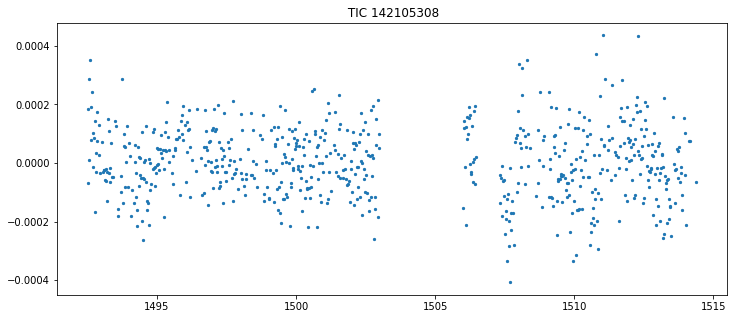

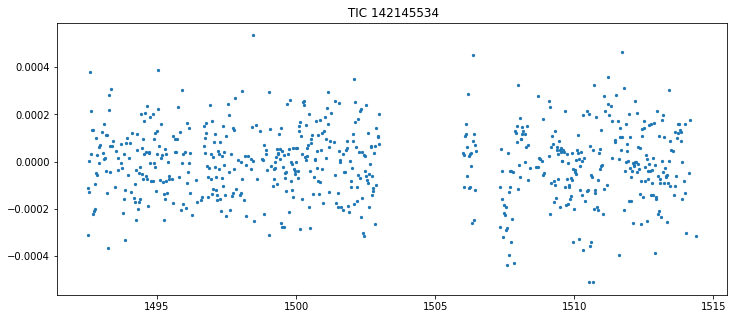

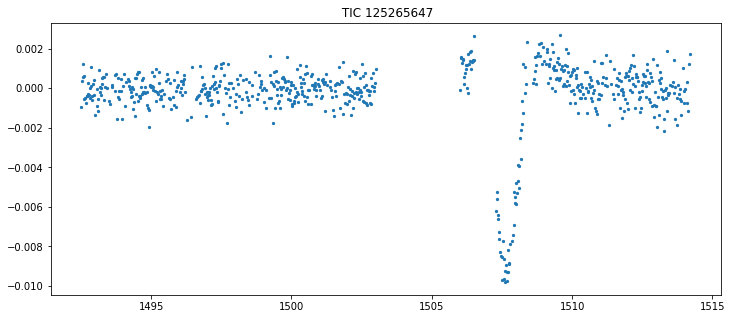

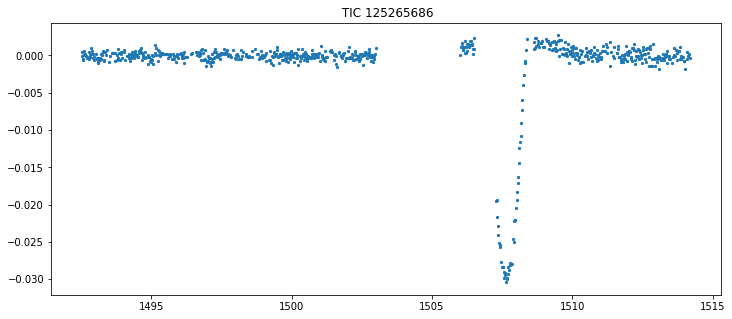

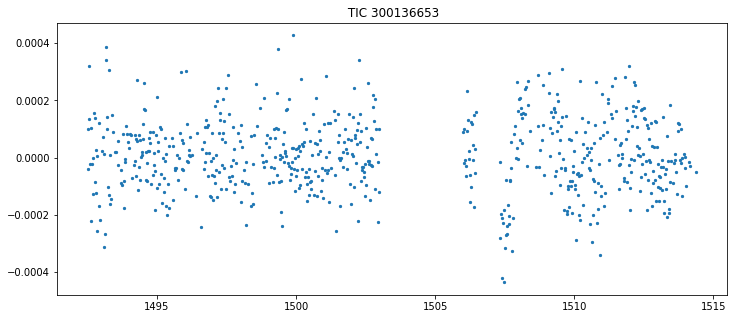

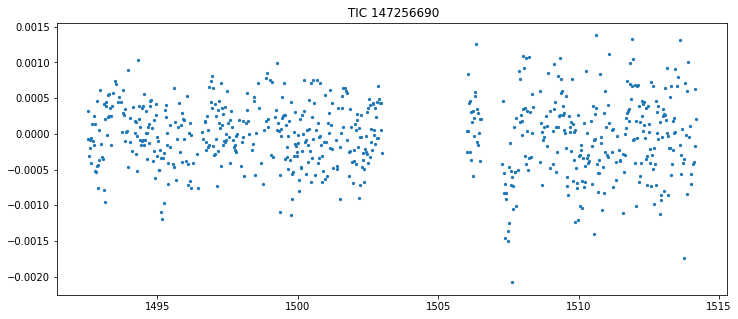

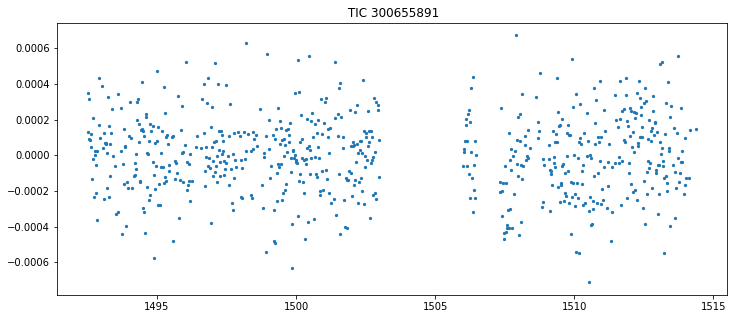

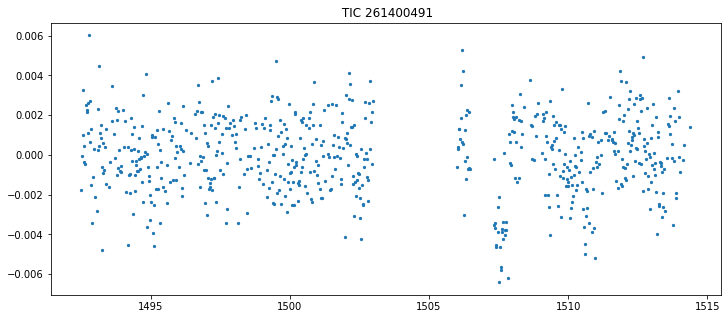

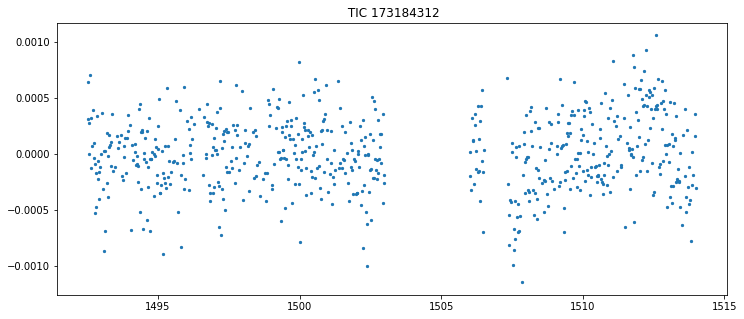

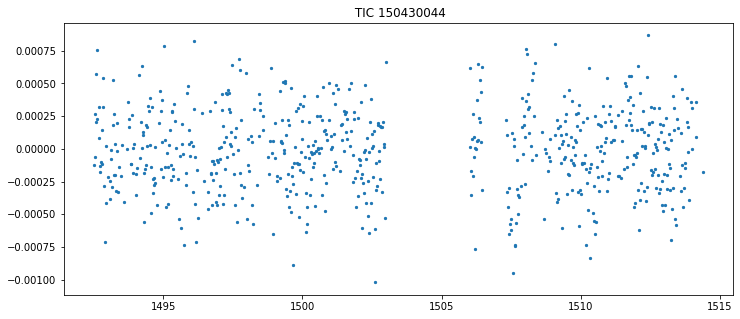

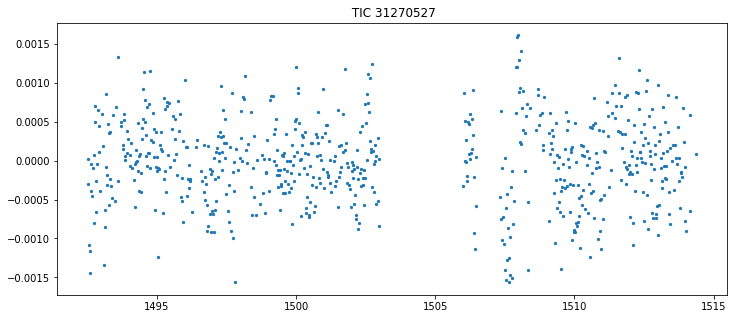

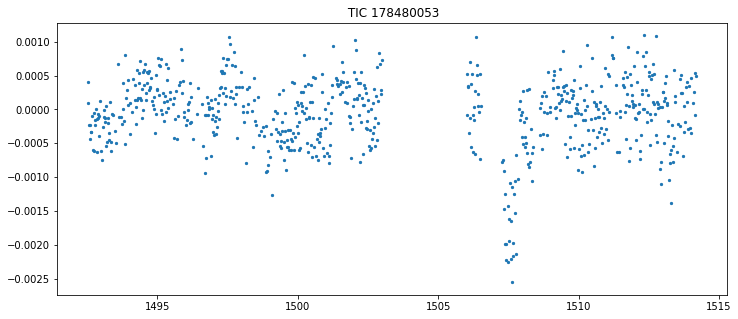

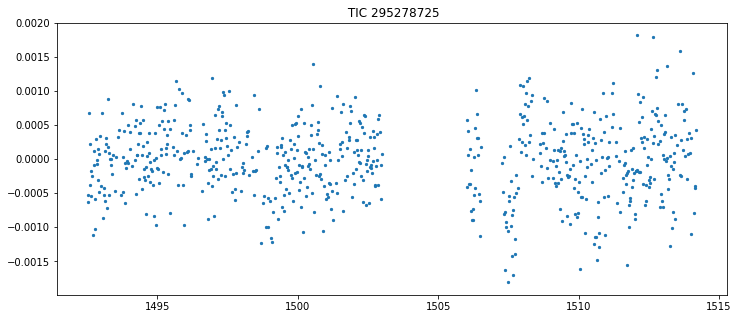

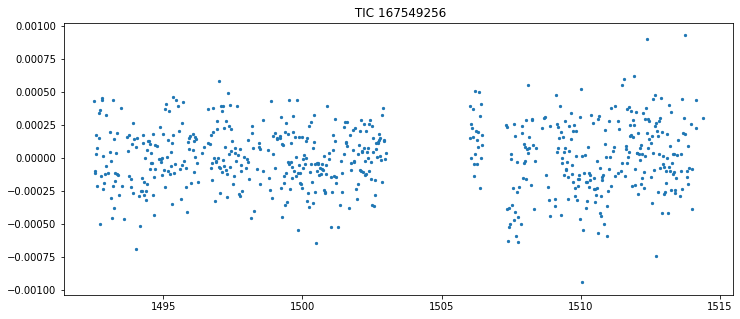

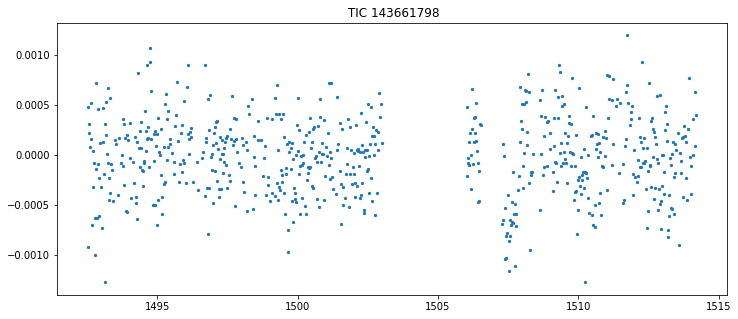

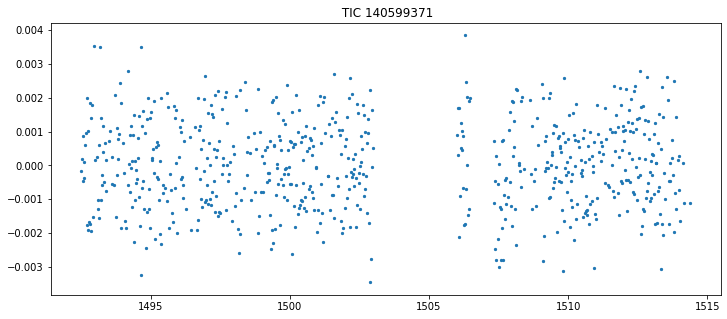

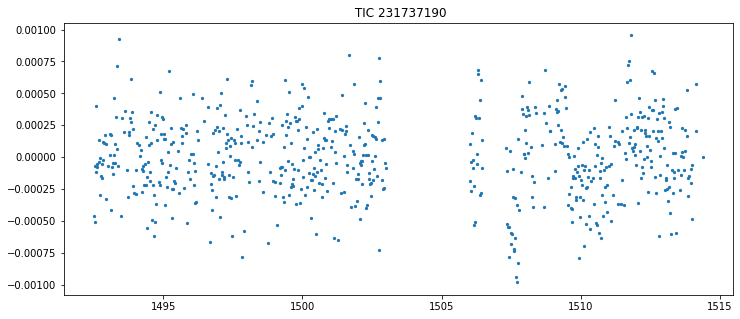

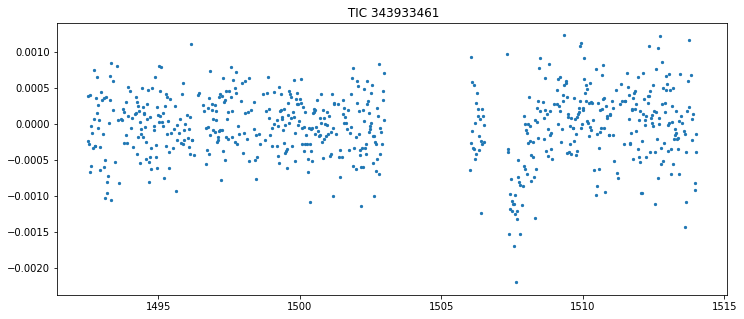

In [17]:
for i in data_new[(data_new.time >= bin_left_edge) & (data_new.time <= bin_right_edge)].abs_path.head(50): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=1)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()